BLEU（bilingual evaluation understudy）

$\exp\left( \min\left( 0, 1 - \frac{\text{len}_{label}}{\text{len}_{pred}} \right) \right) \prod_{n=1}^k p_n^{1/2^n}
$

解释$p_n$是指预测序列中的$n$元语法，就是按照顺序$n$个组成一组，只要这组在$label$里面也有，就分子加1，分母是预测序列中$n$元语法的数量.

$<sos>$ Start of Sequence 序列开始标记,在解码阶段，作为生成序列的起始输入，告诉模型从这里的开始生成.

$<pad>$(Padding) 填充标记，在解码阶段，如果生成的序列长度不够，则用填充标记填充.

$<eos>$ End of Sequence 序列结束标记，在解码阶段，当生成的序列达到指定长度或者遇到结束标记时，停止生成.

$<unk>$ Unknown 未知标记，当模型遇到它从未见过的词时，用这个标记代替.

贪心搜索，原理是每次选择概率最大的词，但是这样会导致生成的序列不够多样，所以引入了束搜索，就是每次选择概率最大的$N$个词，然后从这$N$个词中再选择概率最大的词，这样就可以生成更多的序列，但是这样也会导致计算量增加，所以束搜索的束宽$N$需要根据实际情况进行调整.
beam search 原理是假设输出词表有m个，beam width=2,最大的长度是n，那么我们可以这样选择：第一个单词最大概率的两个，然后这两个分别作为第一个单词，然后之后就是这两个单词作为起点，进行贪心搜索.

**Chapter 10 注意力机制**

Bahdanau注意力，Transformer架构，multi-head attention,self-attention,

注意力机制通过注意力汇聚将查询(自主性提示)和键(非自主性提示)结合在一起，实现对值(感官输入)的选择倾向。

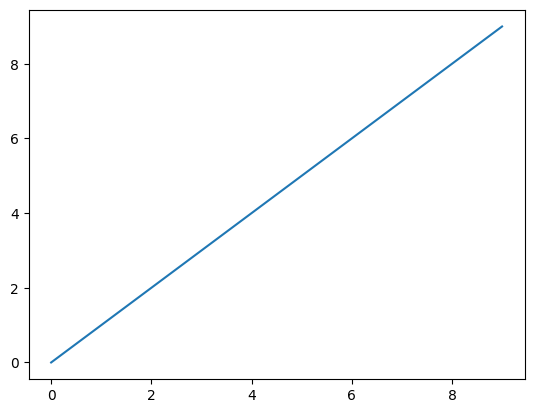

In [8]:
import numpy as np

import matplotlib.pyplot as plt
import torch

def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(10, 4), cmap='viridis'):
    """可视化注意力权重的热力图
    matrices: shape (batch, query_len, key_len) 或 (query_len, key_len)
    xlabel, ylabel: 坐标轴标签
    titles: 每个子图的标题
    """
    if isinstance(matrices, np.ndarray) and matrices.ndim == 2:
        matrices = [matrices]
    elif isinstance(matrices, list) and isinstance(matrices[0], np.ndarray) and matrices[0].ndim == 2:
        pass
    else:
        matrices = matrices.squeeze()
        if matrices.ndim == 2:
            matrices = [matrices]
        else:
            matrices = [matrices[i] for i in range(matrices.shape[0])]

    num = len(matrices)
    fig, axes = plt.subplots(1, num, figsize=figsize)
    if num == 1:
        axes = [axes]
    for i, (ax, matrix) in enumerate(zip(axes, matrices)):
        im = ax.imshow(matrix, cmap=cmap)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        if titles:
            ax.set_title(titles[i])
        fig.colorbar(im, ax=ax)
    plt.tight_layout()
    plt.show()
x=torch.arange(10)
y=torch.arange(10)
plt.plot(x,y)
plt.show()

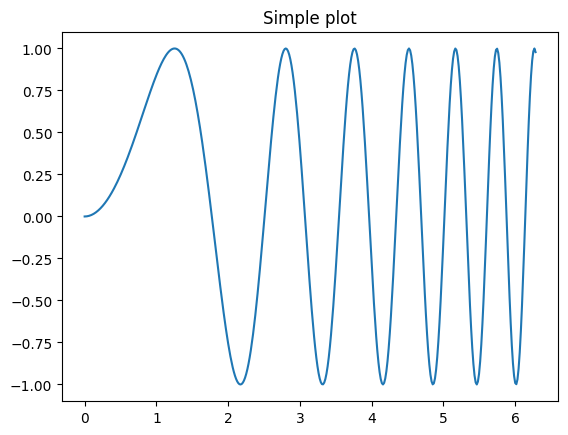

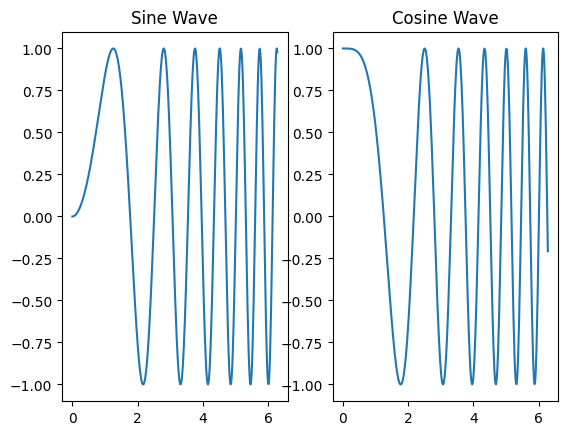

In [9]:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)
y1=np.cos(x**2)
    # Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')
plt.show()
fig,ax=plt.subplots(1,2)
ax[0].plot(x,y)
ax[1].plot(x,y1)

ax[0].set_title('Sine Wave')
ax[1].set_title('Cosine Wave')
plt.show()

Nadaraya-Watson kernel regression is a non-parametric method for regression analysis. It is based on the idea of using a kernel function to weight the data points and estimate the regression function. The kernel function is a function that takes two points and returns a weight. The weights are used to compute the weighted sum of the data points, which is then used to estimate the regression function. The weights are computed using a kernel function that takes into account the distance between the data points and the regression line. The kernel function can be a Gaussian, a triangular, or a uniform kernel.

这个是Nadaraya-Watson核回归的原理。$(x_i,y_i)$是训练集合，用来估计$x$对应的$f(x)$值



$f(x)=\sum\limits_{i=1}^n\frac{K(x-x_i)}{\sum\limits_{j=1}^nK(x-x_j)}y_i$

$f(x)=\alpha(x,x_i)y_i$这里的$x$是查询，$(x_i,y_i)$是键值对，将查询$x$和键$x_i$之间的关系建模为注意力权重$\alpha(x,x_i)$,将每个权重分配给$y_i$，然后求和得到$f(x)$。

x_train: torch.Size([50])
a= tensor([ 4, 19, 44, 20, 40, 26,  2,  7, 12, 24, 37, 11, 22, 41, 49, 25,  5, 33,
        13,  3, 34, 17, 39, 28, 32,  0, 35, 10,  6,  8, 18, 14, 21,  1, 23, 36,
        46, 27,  9, 31, 16, 47, 30, 45, 29, 38, 48, 42, 43, 15])
x_repeat: torch.Size([50, 50])
x_repeat tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000],
        [0.2000, 0.2000, 0.2000,  ..., 0.2000, 0.2000, 0.2000],
        ...,
        [4.7000, 4.7000, 4.7000,  ..., 4.7000, 4.7000, 4.7000],
        [4.8000, 4.8000, 4.8000,  ..., 4.8000, 4.8000, 4.8000],
        [4.9000, 4.9000, 4.9000,  ..., 4.9000, 4.9000, 4.9000]])


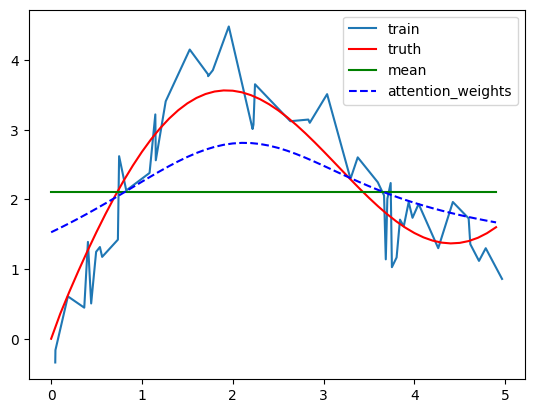

In [10]:
import numpy as np
def add_arrays(arr1, arr2):
    return np.add(arr1, arr2)
import numpy as np
def add_arrays(arr1, arr2):
    return arr1 + arr2
arr1 = np.array([1, 2, 3])
n_train=50 #训练样本数
import torch,random
x_train=torch.rand(n_train)*5 #生成随机输入,单独的torch.rand()返回的是[0,1)的均匀分布]
print("x_train:",x_train.shape)
x_train,a=torch.sort(x_train)
print("a=",a)
def f(x):
    f=2*torch.sin(x)+x**0.8
    return f
y_train=f(x_train)+torch.normal(0,0.5,size=(n_train,)) #生成随机输出
import matplotlib.pyplot as plt

x_test=torch.arange(0,5,0.1)
y1=f(x_test)
n1=len(x_test)
y_hat=torch.repeat_interleave(y_train.mean(),n1)#torch.repeat_interleave()函数将y_train.mean()重复n1次
x_repeat=x_test.repeat_interleave(n_train).reshape((-1,n1))
#x_repeat是[50,50]
import torch.nn as nn
attention_weights=nn.functional.softmax(-(x_repeat-x_train)**2/2,dim=1)

y_hat1=torch.matmul(attention_weights,y_train)

print("x_repeat:",x_repeat.shape)
print("x_repeat",x_repeat)
plt.plot(x_train.numpy(),y_train.numpy(),'-')
plt.plot(x_test,y1,'-r')
plt.plot(x_test,y_hat,'-g')
plt.plot(x_test,y_hat1,'--b')
plt.legend(['train','truth','mean','attention_weights'])#添加图例

plt.show()

In [11]:
x=torch.ones((2,1,4))
y=torch.ones((2,4,6))
z=torch.bmm(x,y)
print("z.shape=",z.shape)
weights=torch.rand((2,10))*0.1
values=torch.arange(20).reshape((2,10))*1.0
w=torch.bmm(weights.unsqueeze(1),values.unsqueeze(-1))
print("w.shape=",w.shape)
print("weights.unsqueeze(1).shape=",weights.unsqueeze(1).shape)
#掩蔽softmax操作
mask=torch.zeros((2,10))
mask[:,0]=1
mask[:,5]=1
masked_w=w*mask.unsqueeze(-1)
print("masked_w.shape=",masked_w.shape)
softmax_w=torch.softmax(masked_w,dim=1)
print("softmax_w.shape=",softmax_w.shape)

z.shape= torch.Size([2, 1, 6])
w.shape= torch.Size([2, 1, 1])
weights.unsqueeze(1).shape= torch.Size([2, 1, 10])
masked_w.shape= torch.Size([2, 10, 1])
softmax_w.shape= torch.Size([2, 10, 1])


加性注意力:  $a(q,k)=w_v^Ttanh(W_q q+W_k k)\in \mathbb{R}$.


$W_q\in \mathbb{R}^{h\times q}$, $W_k\in \mathbb{R}^{h\times k}$, $w_v\in \mathbb{R}^{h}$.


缩放点积注意力:  $a(q,k)=\frac{q^T k}{\sqrt{d}}\in \mathbb{R}$.

实践中：$\text{softmax}\left(\frac{Q K^T}{\sqrt{d}}V\right)\in\mathbb{R}^{n\times v}$

$Q\in\mathbb{R}^{n\times d}$, $K\in\mathbb{R}^{m\times d}$, $V\in\mathbb{R}^{m\times v}$, $d$为模型的维度。
循环神经网络的编码器将长度可变的序列转换为固定形状的上下文变量，然后循环神经网络的解码器根据生成的词元和上下文变量按词元生成输出序列词元。

注意力机制是一种对齐模型，它能够捕捉输入序列中不同位置的相关性，并将其转化为上下文变量。
$Bahdanau $注意力，$c_{t'}=\sum\limits_{t=1}^T \alpha(s_{t'-1},h_t)h_t$,时间步$t'-1$的解码器隐状态$s_{t'-1}$是查询，编码器隐状态$h_t$即是键也是值。



Bahdanau注意力机制，公式$e_{ti}=v_a^T\tanh(W_as_{t-1}+U_ah_i)$，其中$W_a,U_a,v_a$是可学习参数，$e_{ti}$是相关性分数,

将所有$e_{ti}$ Softmax函数归一化:
${\alpha}_{ti}=\frac{exp(e_{ti})}{\sum_{j=1}^T exp(e_{tj})}$

计算上下文权重

$c_t= \sum_{i=1}^T{\alpha}_{ti}h_i$

context shape: torch.Size([2, 4])
attention weights: tensor([[0.1939, 0.0804, 0.2748, 0.1659, 0.2850],
        [0.2994, 0.1869, 0.2046, 0.1134, 0.1958]], grad_fn=<SoftmaxBackward0>)


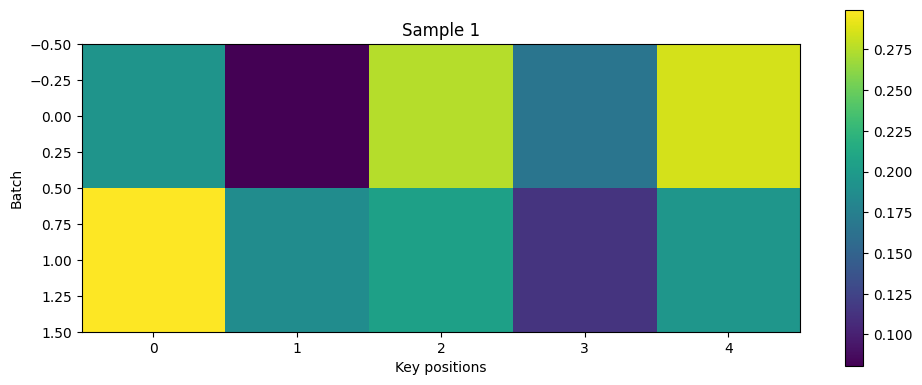

In [12]:
import torch

import torch.nn as nn
import torch.nn.functional as F

class BahdanauAttention(nn.Module):
    def __init__(self, query_dim, key_dim, attn_dim):
        super().__init__()
        self.W_q = nn.Linear(query_dim, attn_dim, bias=False)
        self.W_k = nn.Linear(key_dim, attn_dim, bias=False)
        self.v = nn.Linear(attn_dim, 1, bias=False)

    def forward(self, query, keys, values):
        # query: (batch, query_dim)
        # keys: (batch, seq_len, key_dim)
        # values: (batch, seq_len, value_dim)
        # Expand query to (batch, seq_len, attn_dim)
        query_proj = self.W_q(query).unsqueeze(1)  # (batch, 1, attn_dim)
        keys_proj = self.W_k(keys)                 # (batch, seq_len, attn_dim)
        scores = self.v(torch.tanh(query_proj + keys_proj)).squeeze(-1)  # (batch, seq_len)
        attn_weights = F.softmax(scores, dim=-1)    # (batch, seq_len)
        context = torch.bmm(attn_weights.unsqueeze(1), values).squeeze(1)  # (batch, value_dim)
        return context, attn_weights

# 小例子
batch, seq_len, key_dim, query_dim, attn_dim, value_dim = 2, 5, 4, 3, 8, 4
torch.manual_seed(0)# 设置随机种子，随机种子是为了保证每次运行结果一致
keys = torch.randn(batch, seq_len, key_dim)
values = keys.clone()  # 通常值和值向量可以一样
query = torch.randn(batch, query_dim)

attn = BahdanauAttention(query_dim, key_dim, attn_dim)
context, attn_weights = attn(query, keys, values)
print("context shape:", context.shape)
print("attention weights:", attn_weights)

# 可视化注意力权重
show_heatmaps(attn_weights.detach().numpy(), xlabel='Key positions', ylabel='Batch', titles=['Sample 1', 'Sample 2'])

*位置编码*,假设输入$X\in \mathbb{R}^{n\times d}$,包含一个序列中n个词元的d维嵌入表示，假设位置编码是$P\in\mathbb{R}^{n\times d}$,



$P(i,2j)=\sin\left(\frac{i}{10000^{2j/d}}\right)$,

$P(i,2j+1)=\cos\left(\frac{i}{10000^{2j/d}}\right)$,

In [13]:
print((3//2)*2)
from torch import nn
class PositionWiseFFN(nn.Module):#从ffn_num_input到ffn_num_outputs的全连接层
    """基于位置的前馈网络"""
    def __init__(self, ffn_num_input, ffn_num_hiddens, ffn_num_outputs,**kwargs):
        super().__init__()

        self.dense1=nn.Linear(ffn_num_input, ffn_num_hiddens)
        self.relu=nn.ReLU()
        self.dense2=nn.Linear(ffn_num_hiddens, ffn_num_outputs)
        
    def forward(self, X):
            
        return self.dense2(self.relu(self.dense1(X)))
ffn=PositionWiseFFN(4,4,8)#对输入的维度进行初始化，将类实例化
ffn.eval()
a=torch.ones((2,3,4))
b=ffn(a)
print(b[0].shape)

ln=nn.LayerNorm(2)
bn=nn.BatchNorm1d(2)
x=torch.tensor([[1,2],[3,4]],dtype=torch.float32)

print('layer norm:',ln(x),'\nbatch norm:',bn(x))

class AddNorm(nn.Module):#输入X,Y先对Y进行dropout，然后相加，再进行layernorm
    """残差连接后进行层归一化"""
    def __init__(self, normalized_shape, dropout, **kwargs):
        super().__init__()
        self.dropout = nn.Dropout(dropout)
        self.ln = nn.LayerNorm(normalized_shape)

    def forward(self, X, Y):
        return self.ln(self.dropout(Y) + X)

2
torch.Size([3, 8])
layer norm: tensor([[-1.0000,  1.0000],
        [-1.0000,  1.0000]], grad_fn=<NativeLayerNormBackward0>) 
batch norm: tensor([[-1.0000, -1.0000],
        [ 1.0000,  1.0000]], grad_fn=<NativeBatchNormBackward0>)


In [ ]:
import torch

import torch.nn as nn
import torch.nn.functional as F

class EncoderBlock(nn.Module):
    """Transformer编码器块"""
    def __init__(self, d_model, num_heads, ffn_hidden, dropout=0.1):
        super().__init__()
        self.attn = nn.MultiheadAttention(d_model, num_heads, dropout=dropout, batch_first=True)
        self.addnorm1 = AddNorm(d_model, dropout)
        self.ffn = PositionWiseFFN(d_model, ffn_hidden, d_model)
        self.addnorm2 = AddNorm(d_model, dropout)

    def forward(self, x, src_mask=None):
        # x: (batch, seq_len, d_model)
        attn_output, _ = self.attn(x, x, x, key_padding_mask=src_mask)
        x = self.addnorm1(x, attn_output)#先对attn_output进行随机丢弃，与x相加，然后LayerNorm，
        ffn_output = self.ffn(x)#这是一个全连接层，主要是改变维度
        x = self.addnorm2(x, ffn_output)#再来一次残差连接，原理和adnorm1一样，
        return x

class DecoderBlock(nn.Module):
    """Transformer解码器块"""
    def __init__(self, d_model, num_heads, ffn_hidden, dropout=0.1):
        super().__init__()
        self.self_attn = nn.MultiheadAttention(d_model, num_heads, dropout=dropout, batch_first=True)
        self.addnorm1 = AddNorm(d_model, dropout)
        self.cross_attn = nn.MultiheadAttention(d_model, num_heads, dropout=dropout, batch_first=True)
        self.addnorm2 = AddNorm(d_model, dropout)
        self.ffn = PositionWiseFFN(d_model, ffn_hidden, d_model)
        self.addnorm3 = AddNorm(d_model, dropout)

    def forward(self, x, enc_output, tgt_mask=None, memory_mask=None):
        # x: (batch, tgt_len, d_model)
        # enc_output: (batch, src_len, d_model)
        self_attn_output, _ = self.self_attn(x, x, x, attn_mask=tgt_mask)#计算attn_output
        x = self.addnorm1(x, self_attn_output)#残差连接
        #以下是计算交叉注意力，原理是计算q=x,k=enc_output,v=enc_output，然后计算注意力
        #enc_output作为key和value，x作为query,
        cross_attn_output, _ = self.cross_attn(x, enc_output, enc_output, attn_mask=memory_mask)#再计算一次注意力
        x = self.addnorm2(x, cross_attn_output)#残差连接
        ffn_output = self.ffn(x)#全连接层
        x = self.addnorm3(x, ffn_output)#残差连接
        return x

# 示例：定义一个编码器和解码器
d_model = 8
num_heads = 2
ffn_hidden = 16
dropout = 0.1

encoder = EncoderBlock(d_model, num_heads, ffn_hidden, dropout)
decoder = DecoderBlock(d_model, num_heads, ffn_hidden, dropout)

# 假设输入
src = torch.rand(2, 5, d_model)  # (batch, src_len, d_model)
tgt = torch.rand(2, 4, d_model)  # (batch, tgt_len, d_model)

# 编码器输出
enc_output = encoder(src)
# 解码器输出
dec_output = decoder(tgt, enc_output)

print("Encoder output shape:", enc_output.shape)
print("Decoder output shape:", dec_output.shape)

Encoder output shape: torch.Size([2, 5, 8])
Decoder output shape: torch.Size([2, 4, 8])


输入src形状: torch.Size([2, 5, 8])
输入tgt形状: torch.Size([2, 4, 8])
编码器输出形状: torch.Size([2, 5, 8])
解码器输出形状: torch.Size([2, 4, 8])
编码器输出示例: tensor([-0.3675,  2.0915, -0.0628, -1.2245, -0.2479,  0.7950, -1.1282,  0.1443],
       grad_fn=<SelectBackward0>)
解码器输出示例: tensor([ 1.3169, -1.1426,  0.2879, -0.9659,  1.4758,  0.0445,  0.2816, -1.2981],
       grad_fn=<SelectBackward0>)


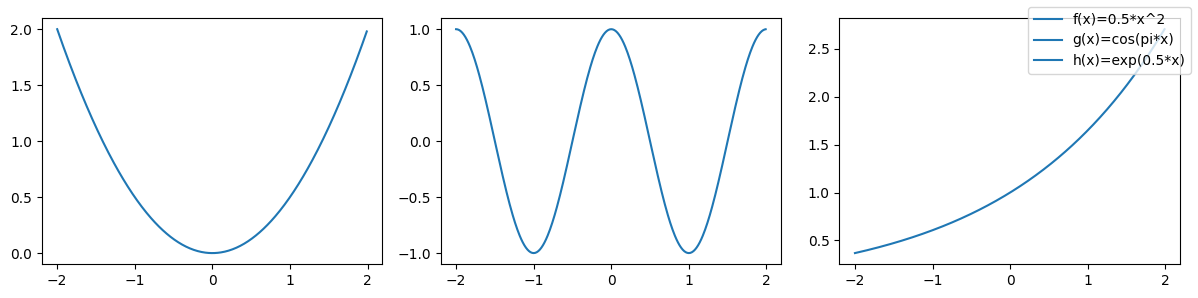

In [ ]:
# 使用已定义的encoder和decoder做一个简单的例子
# src: (batch, src_len, d_model), tgt: (batch, tgt_len, d_model)
print("输入src形状:", src.shape)
print("输入tgt形状:", tgt.shape)

# 编码器输出
enc_out = encoder(src)
print("编码器输出形状:", enc_out.shape)

# 解码器输出
dec_out = decoder(tgt, enc_out)
print("解码器输出形状:", dec_out.shape)

# 取第一个batch的第一个位置向量，展示内容
print("编码器输出示例:", enc_out[0, 0])
print("解码器输出示例:", dec_out[0, 0])

def f(x):
    return 0.5*x**2
def g(x):
    return torch.cos(np.pi*x)
def h(x):
    return torch.exp(0.5*x)
x=torch.arange(-2,2,0.01)
fig,axes=plt.subplots(1,3,figsize=(12,3))
axes[0].plot(x.numpy(),f(x).numpy(),label='f(x)=0.5*x^2')
axes[1].plot(x.numpy(),g(x).numpy(),label='g(x)=cos(pi*x)')
axes[2].plot(x.numpy(),h(x).numpy(),label='h(x)=exp(0.5*x)')
fig.add_gridspec()
fig.tight_layout()
fig.legend()
plt.show()



随机梯度下降是从n个样本中，随机抽取1个样本，计算梯度，然后更新参数。重复这个过程，直到收敛。学习率保持不变。


Epoch  1: Loss = 0.1565
Epoch  2: Loss = 0.0996
Epoch  3: Loss = 0.0793
Epoch  4: Loss = 0.0629
Epoch  5: Loss = 0.0505
Epoch  6: Loss = 0.0403
Epoch  7: Loss = 0.0330
Epoch  8: Loss = 0.0277
Epoch  9: Loss = 0.0234
Epoch 10: Loss = 0.0203
Epoch 11: Loss = 0.0178
Epoch 12: Loss = 0.0159
Epoch 13: Loss = 0.0146
Epoch 14: Loss = 0.0136
Epoch 15: Loss = 0.0129
Epoch 16: Loss = 0.0120
Epoch 17: Loss = 0.0115
Epoch 18: Loss = 0.0112
Epoch 19: Loss = 0.0109
Epoch 20: Loss = 0.0109
Epoch 21: Loss = 0.0105
Epoch 22: Loss = 0.0105
Epoch 23: Loss = 0.0104
Epoch 24: Loss = 0.0103
Epoch 25: Loss = 0.0102
Epoch 26: Loss = 0.0102
Epoch 27: Loss = 0.0102
Epoch 28: Loss = 0.0102
Epoch 29: Loss = 0.0102
Epoch 30: Loss = 0.0101
Epoch 31: Loss = 0.0101
Epoch 32: Loss = 0.0101
Epoch 33: Loss = 0.0101
Epoch 34: Loss = 0.0101
Epoch 35: Loss = 0.0101
Epoch 36: Loss = 0.0101
Epoch 37: Loss = 0.0101
Epoch 38: Loss = 0.0101
Epoch 39: Loss = 0.0101
Epoch 40: Loss = 0.0101
Epoch 41: Loss = 0.0101
Epoch 42: Loss =

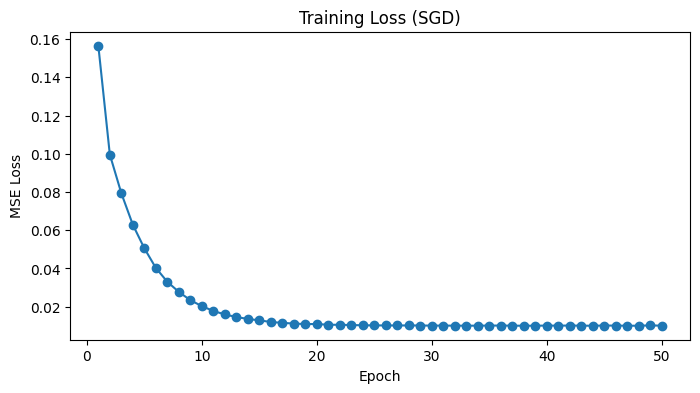

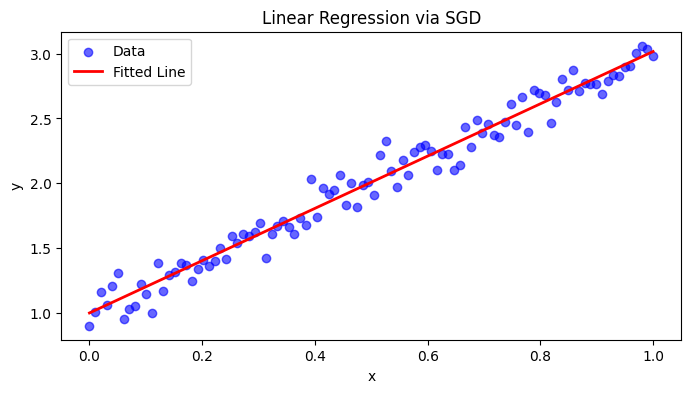

In [19]:
# Create synthetic data for a simple linear regression:
#    y = 2*x + 1 + noise
true_weight = 2.0
true_bias = 1.0
n_samples = 100
x_data = torch.linspace(0, 1, n_samples).unsqueeze(1)  # shape (n_samples, 1)
noise = torch.randn(x_data.size()) * 0.1
y_data = true_weight * x_data + true_bias + noise

# Define a simple linear model: y = wx + b
model = torch.nn.Linear(1, 1)

# We'll use SGD with mean squared error loss.
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
criterion = torch.nn.MSELoss()

losses = []
batch_size = 10
n_epochs = 50

for epoch in range(n_epochs):
    # Shuffle indices for each epoch
    permutation = torch.randperm(n_samples)
    for i in range(0, n_samples, batch_size):
        indices = permutation[i:i+batch_size]
        batch_x = x_data[indices]
        batch_y = y_data[indices]
        
        optimizer.zero_grad()
        predictions = model(batch_x)
        loss = criterion(predictions, batch_y)
        loss.backward()
        optimizer.step()
    
    # Evaluate loss on the full dataset
    with torch.no_grad():
        pred_all = model(x_data)
        total_loss = criterion(pred_all, y_data).item()
        losses.append(total_loss)
        print(f"Epoch {epoch+1:2d}: Loss = {total_loss:.4f}")

# Plot the training loss curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, n_epochs+1), losses, marker='o')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss (SGD)")
plt.show()

# Plot the data and the fitted regression line
with torch.no_grad():
    y_pred = model(x_data)

plt.figure(figsize=(8, 4))
plt.scatter(x_data.numpy(), y_data.numpy(), label="Data", color="blue", alpha=0.6)
plt.plot(x_data.numpy(), y_pred.numpy(), color="red", label="Fitted Line", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression via SGD")
plt.legend()
plt.show()

In [ ]:
from sympy import hyper


def init_momentum_states(feature_dim):
    v_w=torch.zeros((feature_dim,1))
    v_b=torch.zeros(1)
    return (v_w,v_b)
v1,v2=init_momentum_states(3)
print(v1,v2)
def sgd_momentum(params,states,hyperparams):
    for p,v in zip(params,states):
        with torch.no_grad():
            v[:]=hyperparams['momentum']*v+p.grad
            p[:]-=hyperparams['lr']*v
        p.grad.zero_()


tensor([[0.],
        [0.],
        [0.]]) tensor([0.])


AdaGrad算法原理是：

AdaGrad算法是一种自适应的梯度下降算法，它对每个参数的学习率进行自适应调整，使得每个参数的学习率在迭代过程中逐渐衰减。

AdaGrad算法的基本思想是：

- 首先，初始化一个向量g，用于存储每个参数的历史梯度的平方和。
- 对于每个参数，计算梯度g。
- 然后，更新参数：

  $w = w - \eta * \frac{g} { \sqrt{g + \epsilon}}$
  其中，$\eta$是学习率，$\epsilon$是防止除零的小值。

- 最后，更新g：

  $g = g + \frac{g^2} { \sqrt{g^2 + \epsilon}}$

AdaGrad算法的特点是：

- 适用于大量稀疏的梯度，适合于处理大规模的神经网络。
- 学习率随着迭代次数的增加而衰减，可以有效防止模型陷入局部最小值。
- 学习率可以自适应地调整，使得每个参数的学习率在迭代过程中逐渐衰减。



$S(i,t+1)=S(i,t)+(\partial_if(x))^2$

$w_t=w_{t-1}-\frac{\eta}{\sqrt{S(i,t)+\epsilon}}\frac{\partial f(x)}{\partial w_i}$

**Adadelta算法**

Adadelta算法是对Adagrad算法的改进，主要解决Adagrad算法在学习率衰减的问题。Adadelta算法在每个迭代中都使用两个变量：一个是累积梯度的平方的指数加权移动平均值，另一个是累积更新值的平方的指数加权移动平均值。
公式是：

$$\begin{aligned}
S_t &= \rho S_{t-1} + (1-\rho)g_t^2 \\
x_t &= x_{t-1}-g'_t \\
g_t' &= \frac{ \sqrt{\Delta x_{t-1}+\epsilon}}{\sqrt{s_t+\epsilon}}\cdot g_t\\
\end{aligned}$$

其中，$\rho_t$是衰减率，$\epsilon$是微分步长，$\eta$是学习率。$x_t$表示第$t$次迭代时的模型参数，


In [ ]:
def adadelta(params, grads, states, hyperparams):
    rho, eps = hyperparams['rho'], hyperparams['eps']
    for i, param in enumerate(params):
        if param.grad is None:
            continue
        grad = grads[i]
        if states[i] is None:
            states[i] = {'square_avg': np.zeros_like(param), 'acc_delta': np.zeros_like(param)}
        square_avg, acc_delta = states[i]['square_avg'], states[i]['acc_delta']
        square_avg = rho * square_avg + (1 - rho) * grad ** 2
        acc_delta = np.sqrt((acc_delta + eps) / (square_avg + eps)) * grad
        param -= acc_delta
        states[i]['square_avg'] = square_avg
        states[i]['acc_delta'] = acc_delta    
        return params, states
    


**Adam算法**
Adam算法是一种基于动量法的优化算法，它结合了动量法和RMSprop算法的优点。Adam算法的优点是能够自适应调整学习率，使得学习率不断减小，从而能够有效防止模型过拟合。

Adam算法的公式如下：

$$
\begin{aligned}
m_t &= \beta_1 m_{t-1} + (1 - \beta_1) g_t \\
v_t &= \beta_2 v_{t-1} + (1 - \beta_2) g_t^2 \\
\hat{m_t} &= \frac{m_t}{1-\beta_1^t} \\
\hat{v_t} &= \frac{v_t}{1-\beta_2^t} \\
\theta_t &= \theta_{t-1} - \frac{\eta}{\sqrt{\hat{v_t}} + \epsilon} \hat{m_t}
\end{aligned}
$$

其中，$m_t$和$v_t$分别是指数加权移动平均的梯度，$\hat{m_t}$和$\hat{v_t}$是平滑后的梯度，$\theta_t$是参数，$\eta$是学习率，$\epsilon$是为了避免分母为0而添加的常数。


**Yogi算法**

Yogi算法是一种基于RMSprop算法的优化算法，它对RMSprop算法进行了改进，提出了一种新的自适应学习率的方法。Yogi算法的公式如下：

$$
\begin{aligned}
v_t &= \beta_2 v_{t-1} + (1 - \beta_2) g_t^2 \\
\hat{v_t} &= \frac{v_t}{1-\beta_2^t} \\
\theta_t &= \theta_{t-1} - \frac{\eta}{\sqrt{\hat{v_t}} + \epsilon} g_t
\end{aligned}
$$

与Adam算法不同的是，Yogi算法没有使用动量法，而是直接使用RMSprop算法的思想。


**一个稍微完整的例子**

In [8]:
from torch import nn
import torch
def net_fn():
    model=nn.Sequential(nn.Conv2d(1,6,kernel_size=5,padding=2),nn.ReLU(),
                        nn.MaxPool2d(kernel_size=2,stride=2),
                        nn.Conv2d(6,16,kernel_size=5),nn.ReLU(),
                        nn.MaxPool2d(kernel_size=2,stride=2),
                        nn.Flatten(),
                        nn.Linear(16*5*5,120),nn.ReLU(),
                        nn.Linear(120,84),nn.ReLU(),
                        nn.Linear(84,10)
                        )
    return model

net=net_fn()
loss=nn.CrossEntropyLoss()#这个CrossEntropyLoss()函数是用来计算交叉熵损失的，它会把网络输出的每一行的softmax值和标签值做对比，然后计算出交叉熵损失。
#适合分类问题，比如图像分类、语音识别、文本分类等。
from torch import optim #导入优化器
optimizer=optim.SGD(net.parameters(),lr=0.01,momentum=0.9)
#SGD是随机梯度下降法，它是一种常用的优化算法，它会不断更新网络参数，使得损失函数最小。
#lr是学习率，momentum是动量，它可以让网络更加平滑。
from torch.utils.data import DataLoader #导入数据加载器
from torchvision import datasets,transforms #导入数据集和数据预处理
#transforms.Compose()是用于组合多个数据预处理操作的函数。
#transforms.ToTensor()是将PIL.Image或者numpy.ndarray转换为torch.FloatTensor。
#datasets.MNIST()是用于加载MNIST数据集的函数。
trainset=datasets.MNIST(root='./data',train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))
trainloader=DataLoader(trainset,batch_size=64,shuffle=True)#DataLoader是PyTorch提供的用于加载和预处理数据的工具。
#这里我们使用MNIST数据集，它是一个手写数字识别的数据集。
#batch_size是每次加载的数据量，shuffle是是否打乱数据顺序。
for epoch in range(10):
    running_loss=0.0
    for i,data in enumerate(trainloader,0):
        inputs,labels=data
        optimizer.zero_grad()
        outputs=net(inputs)
        loss_value=loss(outputs,labels)
        loss_value.backward()
        optimizer.step()
        running_loss+=loss_value.item()
        if i%2000==1999:
            print('[%d,%5d] loss:%.3f'%(epoch+1,i+1,running_loss/2000))
            running_loss=0.0    
test_dataset=datasets.MNIST(root='./data',train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))
test_loader=DataLoader(test_dataset,batch_size=64,shuffle=True)
correct=0
for i,data in enumerate(test_loader,0):
    outputs=net(data[0])
    _,predicted=torch.max(outputs.data,1)
    correct+=torch.sum(predicted==data[1]).item()
print('Accuracy of the network on the 10000 test images: %d %%'%(100*correct/len(test_dataset)))

Accuracy of the network on the 10000 test images: 98 %


In [4]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# 加载数据
data = load_iris()
X, y = data.data, data.target
# X包含特征数据：花萼长度、花萼宽度、花瓣长度、花瓣宽度
# y包含标签数据：0、1、2分别代表三种鸢尾花

# 划分训练集和测试集，test_size=0.2表示20%的数据作为测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 增加random_state使结果可复现

# 训练模型
model = RandomForestClassifier(n_estimators=100, random_state=42)  # 增加参数使模型更明确
model.fit(X_train, y_train)

# 预测与评估
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(f"准确率: {accuracy:.4f}")  # 格式化输出，保留4位小数

# 可以额外输出一些预测结果对比
print("\n部分预测结果对比:")
for i in range(5):  # 显示前5个样本的预测结果
    print(f"真实标签: {y_test[i]}, 预测标签: {y_pred[i]}")

# 输出特征重要性
print("\n特征重要性:")
for name, importance in zip(data.feature_names, model.feature_importances_):
    print(f"{name}: {importance:.4f}")
    

准确率: 1.0000

部分预测结果对比:
真实标签: 1, 预测标签: 1
真实标签: 0, 预测标签: 0
真实标签: 2, 预测标签: 2
真实标签: 1, 预测标签: 1
真实标签: 1, 预测标签: 1

特征重要性:
sepal length (cm): 0.1081
sepal width (cm): 0.0304
petal length (cm): 0.4400
petal width (cm): 0.4215
